# Linear regression with multiple variables

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
path = 'ex1data2.txt'
data = pd.read_csv(path, names=['Size', 'Bedrooms', 'Price'])

In [235]:
# 特征缩放，仅对X
# mean = data.mean()
# std = data.std()
# data.iloc[:, 0:-1] = (data.iloc[:, 0:-1] - mean) / std
# data.head()

In [236]:
# 特征缩放，对X和y
mean = data.mean()
std = data.std()
data = (data - mean) / std
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [237]:
data.insert(0, 'One', 1)

In [238]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
theta = np.zeros((1, X.shape[1]))
X.shape, y.shape, theta.shape

((47, 3), (47, 1), (1, 3))

In [239]:
def compute_cost(X, y, theta):
    m = len(X)
    J = np.sum((X @ theta.T - y) ** 2) / (2 * m)
    return J

In [240]:
def gradient(X, y, theta):
    m = len(X)
    dJ = (X @ theta.T - y).T @ X / m
    return dJ

In [241]:
def batch_gradient_descent(X, y, theta, iters=1000, alpha=0.01, show_cost='False'):
    costs = []
    for i in range(iters):
        theta = theta - alpha * gradient(X, y, theta)
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        
        if show_cost == True and i % 100 == 0:
            print(cost)
    
    return theta, costs

In [242]:
iters = 1000
alpha = 0.03
theta, costs = batch_gradient_descent(X, y, theta, iters, alpha, show_cost=True)
theta

0.4633036247760586
0.1375554702722021
0.13119471832550011
0.13072419658187798
0.13068927943501774
0.13068668824425508
0.13068649595278223
0.13068648168289093
0.13068648062392665
0.13068648054534124


array([[-1.11984889e-16,  8.84764932e-01, -5.31777642e-02]])

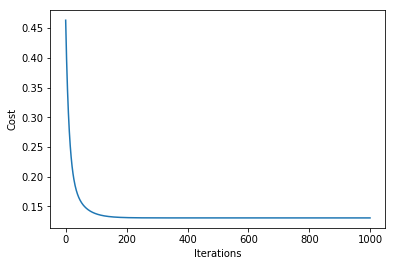

In [243]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters), costs)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.show()

## Normal Equations

In [244]:
def normal_eqn(X, y):
    # X:R(m*n)
    # y:R(m*1)
    
    #Linear algebra
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta

In [245]:
theta2 = normal_eqn(X, y)
print(compute_cost(X, y, theta2.T))
theta2

0.13068648053904197


array([[ 0.        ],
       [ 0.88476599],
       [-0.05317882]])

In [246]:
#用原始样本预测
(X @ theta2) * std[2] + mean[2]

array([[356283.1103389 ],
       [286120.93063401],
       [397489.46984812],
       [269244.1857271 ],
       [472277.85514636],
       [330979.02101847],
       [276933.02614885],
       [262037.48402897],
       [255494.58235014],
       [271364.59918815],
       [324714.54068768],
       [341805.20024107],
       [326492.02609913],
       [669293.21223209],
       [239902.98686016],
       [374830.38333402],
       [255879.96102141],
       [235448.2452916 ],
       [417846.48160547],
       [476593.38604091],
       [309369.11319496],
       [334951.62386342],
       [286677.77333009],
       [327777.17551607],
       [604913.37413438],
       [216515.5936252 ],
       [266353.01492351],
       [415030.01477434],
       [369647.33504459],
       [430482.39959029],
       [328130.30083656],
       [220070.5644481 ],
       [338635.60808944],
       [500087.73659911],
       [306756.36373941],
       [263429.59076914],
       [235865.87731365],
       [351442.99009906],
       [6414